## Background

### Problem Description

An e commerce company just established. The company wants to grow their user base ? Why its important

<img src="https://baselarea.swiss//wp-content/uploads/2023/07/BaselArea_Startup-Stages-scaled.jpg" >
<center> <a href="https://baselarea.swiss//wp-content/uploads/2023/07/BaselArea_Startup-Stages-scaled.jpg"> Source </a>

The company is in stage 4 to scale to a bigger market. Of course expannding user base require effort. We cannot wait for the miracle to come up 

How can we grow user ? To grow user base we can divide into two types 
1. Organic Growth 
2. Non Organic Growth 

So what is the different between both

**Organic Growth** refer to condition where user willingfully to use our product without any intervention. That could happen because of the quality of our product offered and many more

The first type is quite rare, and taking some times.. What we can do about it ? 

We can intervene user growth through some **intervention**. So that is the idea of Non Organic Growth 

Why we need to intervene, its because :  
- User might not know yet our product (exposure)
- User finding difficulties in finding value proposition in our product 

So what kind of intervention we need to do ?

1. **Educating your potential customer all about your product**

This could be done through detailed explanation of your product and why they should use your product

2. **Offer Incentive to potential customer**

The next one is more attractive since customer, can receive trial / free product hence they will have a quick impression of the product, if the product is good the more likely they will convert / buy again

Our product has been crafted carefully, and our social media team already performed maximum, we will try the second approach by offering incentive to potential customer

Now, the question who sould we give incentive ? 


<img src="https://img.freepik.com/premium-vector/targeted-advertisement-campaign-promotional-announcement-customers-attraction-promo_566886-3547.jpg?w=2000" width=600 height=600>
<center><a href="https://img.freepik.com/premium-vector/targeted-advertisement-campaign-promotional-announcement-customers-attraction-promo_566886-3547.jpg?w=2000">Source </a></center>

Our goal : 
1. Target somebody whose likely to continue purchase our product after getting incentive

We know that individual / user may react differently to incentive, we can summary their behaviour using matrix

<center><b>Treatment and Conversion Matrix</b></center>
<img src="https://drive.google.com/uc?id=1qJfG5X7JyC01SKq_p1q3ZVvhzpARZgVQ" width=600 height=600>
<center><b>Source : Author</b></center>

How can we know given a treatment user will convert ? 

This is study of causal inference

Most of causal inference method usually take care of **Average Treatment Effect** or how the average effect when people receive a treatment to outcome variable, some methods are available such as : 
- Backdoor Approach : 

    1. Matching 
    2. Fixed Effect
    3. Difference in Difference (DiD)
- Frontdoor Approaach : 
    1. Regression Discontinuity Design 
    2. Instrumental Variable

Can we use those method for our case ? 
**Unfortunately** no. Its because we are interested in individual (heterogenous) effect or sometimes called as **Conditional Treatment Effect (CATE)** 

### Business Objective

Our business problem is to expand base user or user acquisition.
Our current approach is to give treatment in terms of incentive to measure whether our treatment is success we would like to measure how many user are converted given treatment they receive. Hence, our business metrics is **Conversion Rate**

$\text{Conversion Rate} = \cfrac{\text{Number of user who receive treatment and Converted}} {\text{Number of user who get treatement} }$

**Metrics Context** 

The higher the conversion rate is better. 

<img src="https://www.ruleranalytics.com/wp-content/uploads/average-industry-conversion-rate-ruler-analytics-1024x536.png" height=500 width=600 >
<center><a href="https://www.ruleranalytics.com/wp-content/uploads/average-industry-conversion-rate-ruler-analytics-1024x536.png" >Source</a></center>

### Solution

To find customer who eligible to receive incentive we can , predict uplift score of user who receive treatment, of course predicting uplift score is not the end. 

After prediction we need a **policy** what we should do? 
All observation in previous experiment does have uplift value, but which percentile of uplift score  we are going to select as treatment eligible customer is important

<a href="https://imgflip.com/i/7ymh21"><img src="https://i.imgflip.com/7ymh21.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

### Model Metrics

Some available metrics :
- Area Under the Curve of Uplift 
- Area Under the Curve of Gain 
- Area Under the Curve of Qini


For now we will use Uplift

###  Data Description



- recency

months since last purchase

- history

value of the historical purchases

- used_discount

indicates if the customer used a discount before

- used_bogo

indicates if the customer used a buy one get one before

- zip_code

class of the zip code as Suburban/Urban/Rural

- is_referral

indicates if the customer was acquired from referral channel

- channel

channels that the customer using, Phone/Web/Multichannel

- offer

the offers sent to the customers, Discount/But One Get One/No Offer

- conversion

customer conversion(buy or no)

## Workflow

## 1. Data Preparation

### Load Data

In [187]:
import pandas as pd 
import numpy as np 

In [188]:
data_path = 'data.csv'

In [189]:
# read data 
treatment_data = pd.read_csv(data_path)
treatment_data.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [190]:
treatment_data.columns

Index(['recency', 'history', 'used_discount', 'used_bogo', 'zip_code',
       'is_referral', 'channel', 'offer', 'conversion'],
      dtype='object')

### Check data shapes & types

In [191]:
### Check Shape 
treatment_data.shape

(64000, 9)

In [192]:
treatment_data.dtypes

recency            int64
history          float64
used_discount      int64
used_bogo          int64
zip_code          object
is_referral        int64
channel           object
offer             object
conversion         int64
dtype: object

we can see that our variable match our data type

## Data Preprocessing

### Label Encoding

In [193]:
# channel 
treatment_data['channel'].unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

In [194]:
# offer 
treatment_data['offer'].unique()

array(['Buy One Get One', 'No Offer', 'Discount'], dtype=object)

In [195]:
treatment_data = treatment_data.loc[treatment_data['offer'].isin(['Buy One Get One', 'No Offer'])]

In [196]:
treatment_data['treatment'] = treatment_data['offer'].map({
    'Buy One Get One':1, 'No Offer':0, 'Discount':1
})

In [197]:
treatment_encoded = pd.get_dummies(treatment_data.drop(['offer'],axis=1))

In [198]:
treatment_encoded

,recency,history,used_discount,used_bogo,is_referral,conversion,treatment,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1,0,0,0,1,0,1,0,0,1,0
1,6,329.08,1,1,1,0,0,1,0,0,0,0,1
2,7,180.65,0,1,1,0,1,0,1,0,0,0,1
4,2,45.34,1,0,0,0,1,0,0,1,0,0,1
5,6,134.83,0,1,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63989,10,304.30,1,1,0,1,1,0,1,0,0,0,1
63990,6,80.02,0,1,0,0,0,0,1,0,0,1,0
63991,1,306.10,1,0,1,0,1,0,1,0,0,1,0
63993,4,374.07,0,1,0,0,1,0,1,0,0,1,0


## Data Splitting

The data splitting process is similar to general machine learning workflow

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
T_col = 'treatment'
target_col = 'conversion'
X_col = ['recency', 'history', 'used_discount', 'used_bogo', 'is_referral',
       'zip_code_Rural', 'zip_code_Surburban',
       'zip_code_Urban', 'channel_Multichannel', 'channel_Phone',
       'channel_Web']

In [201]:
X = treatment_encoded.drop(target_col, axis=1)
y = treatment_encoded[target_col]

In [213]:
train_full,test = train_test_split(treatment_encoded,test_size=0.2)
train,val = train_test_split(train_full,test_size=0.25)

In [203]:
train.columns

Index(['recency', 'history', 'used_discount', 'used_bogo', 'is_referral',
       'conversion', 'treatment', 'zip_code_Rural', 'zip_code_Surburban',
       'zip_code_Urban', 'channel_Multichannel', 'channel_Phone',
       'channel_Web'],
      dtype='object')

## Exploratory Data Analysis

Text(0.5, 1.0, 'history')

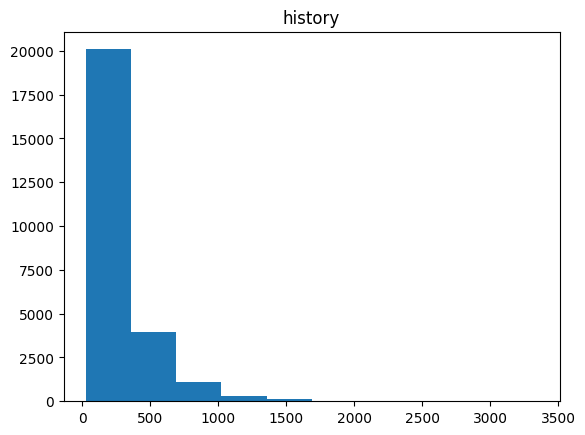

In [253]:
# recency 
plt.hist(train['history'])
plt.title('history')

Text(0.5, 1.0, 'Recency')

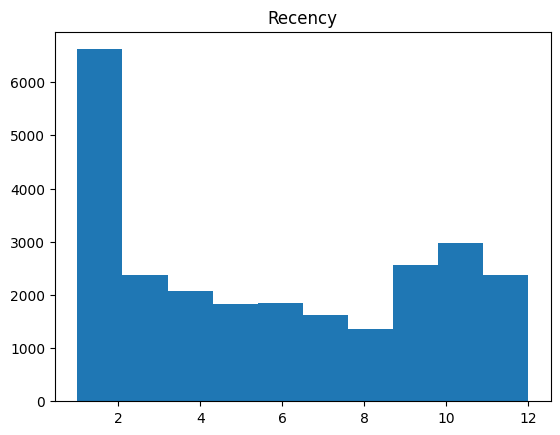

In [254]:
# recency 
plt.hist(train['recency'])
plt.title('Recency')

Text(0.5, 1.0, 'Use Discount')

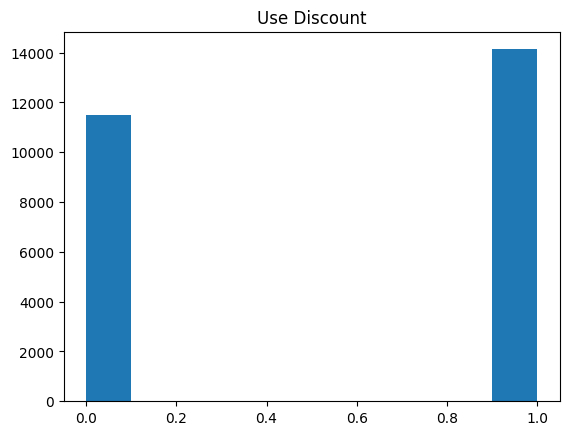

In [258]:
# Discount 
plt.hist(train['used_discount'])
plt.title('Use Discount')

Text(0.5, 1.0, 'Use Buy One Get One')

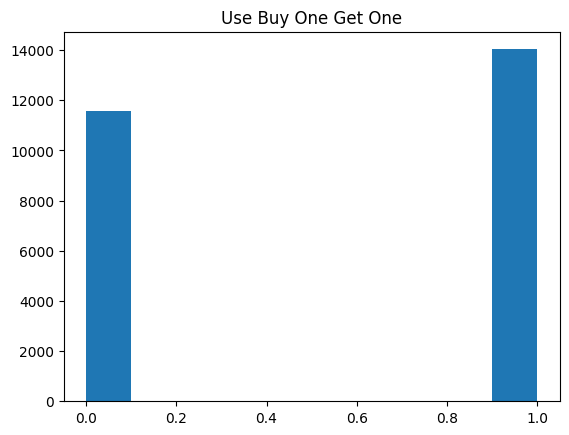

In [257]:
plt.hist(train['used_bogo'])
plt.title('Use Buy One Get One')

Text(0.5, 1.0, 'Use Referral')

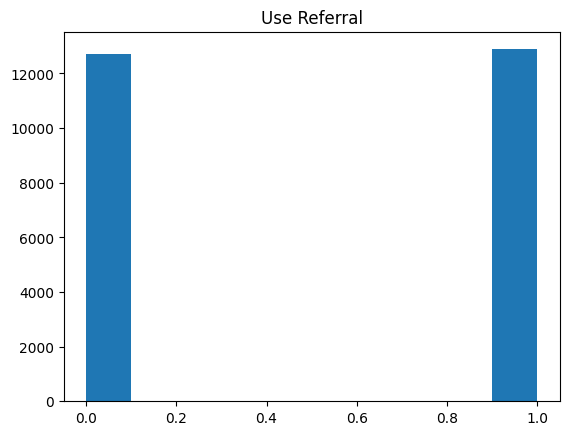

In [261]:
plt.hist(train['is_referral'])
plt.title('Use Referral')

Text(0.5, 1.0, 'Treatment (Buy One Get One)')

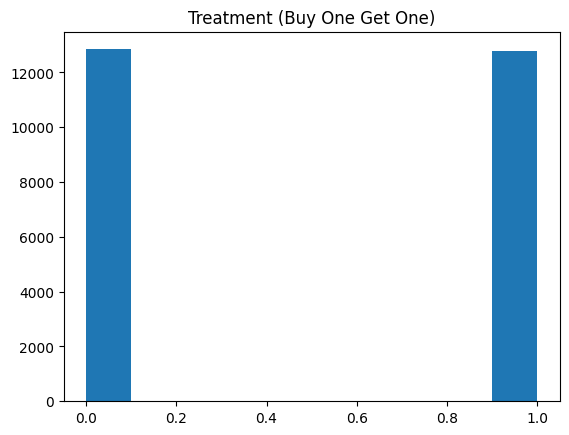

In [262]:
plt.hist(train['treatment'])
plt.title('Treatment (Buy One Get One)')

Text(0.5, 1.0, 'channel_Multichannel')

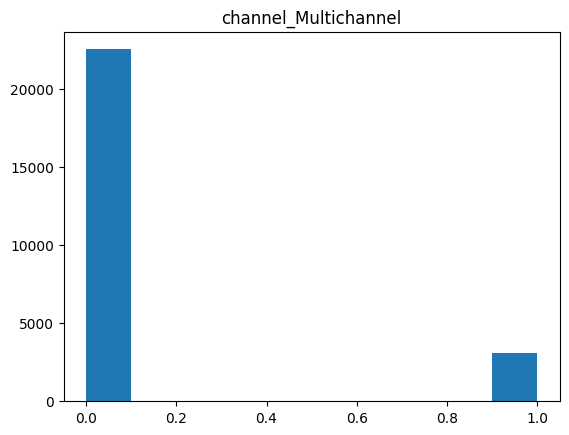

In [264]:
plt.hist(train['channel_Multichannel'])
plt.title('channel_Multichannel')

Text(0.5, 1.0, 'channel_Phone')

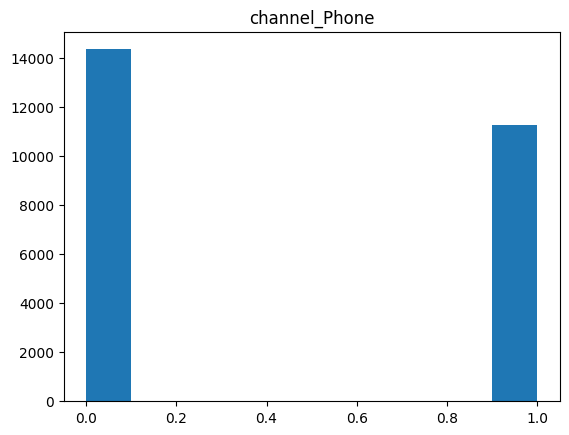

In [265]:
plt.hist(train['channel_Phone'])
plt.title('channel_Phone')

Text(0.5, 1.0, 'channel_Web')

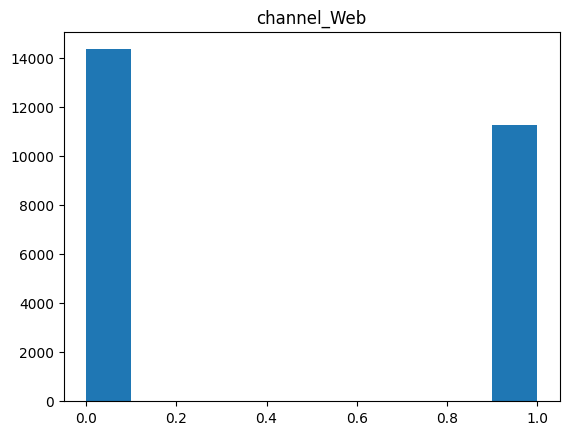

In [266]:
plt.hist(train['channel_Web'])
plt.title('channel_Web')

In [269]:
train.columns

Index(['recency', 'history', 'used_discount', 'used_bogo', 'is_referral',
       'conversion', 'treatment', 'zip_code_Rural', 'zip_code_Surburban',
       'zip_code_Urban', 'channel_Multichannel', 'channel_Phone',
       'channel_Web'],
      dtype='object')

Text(0.5, 1.0, 'zip_code_Urban')

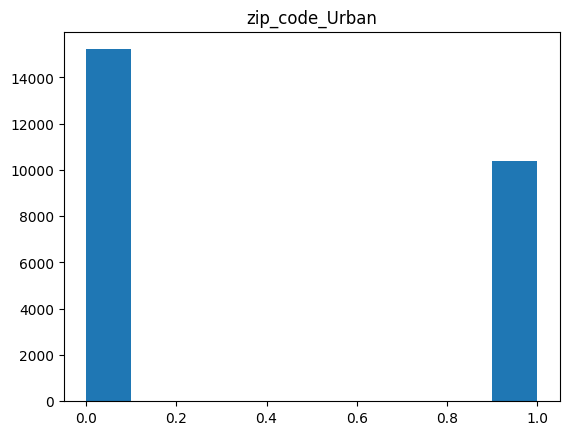

In [270]:

plt.hist(train['zip_code_Urban'])
plt.title('zip_code_Urban')

Text(0.5, 1.0, 'zip_code_Surburban')

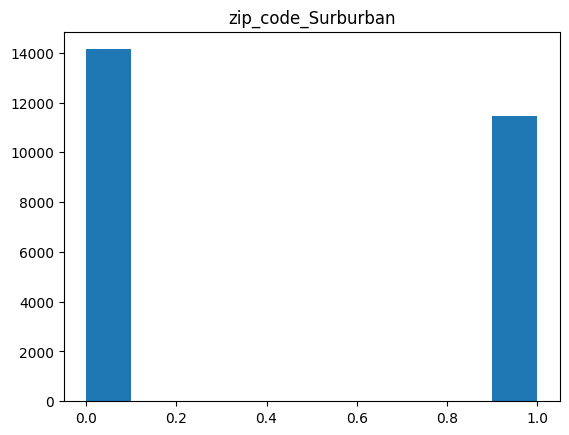

In [271]:

plt.hist(train['zip_code_Surburban'])
plt.title('zip_code_Surburban')

Text(0.5, 1.0, 'zip_code_Rural')

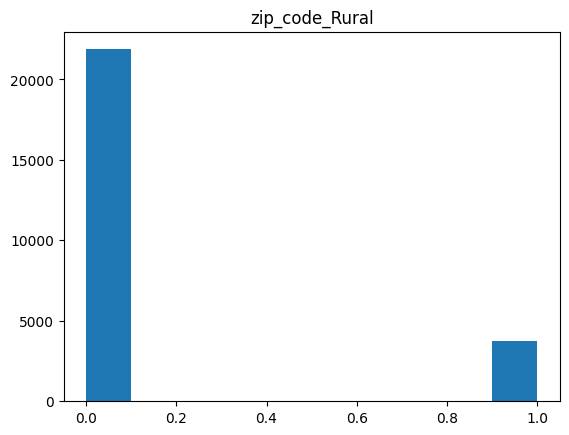

In [272]:

plt.hist(train['zip_code_Rural'])
plt.title('zip_code_Rural')

## 2. Modelling

Approaches : 
1. S-Learner 
2. T-Learner

In [185]:
from sklift.metrics import uplift_at_k,uplift_auc_score,uplift_by_percentile,qini_auc_score
from sklift.viz import plot_uplift_curve

### Single Model Approach (S-Learner)

<img src="https://matheusfacure.github.io/python-causality-handbook/_images/s-learner.png" >
<center><a href="https://matheusfacure.github.io/python-causality-handbook/_images/s-learner.png">Source : Causal Inference for the Brave and True</a></center>


The S-Learner model is a technique in uplift modeling used to understand the impact of a treatment, like a marketing campaign, on individuals' behavior. It works by building a predictive model that considers whether each person received the treatment or not and then estimates how this treatment affected their response. By comparing the predicted outcomes of those who received the treatment to those who didn't, it calculates an uplift score, showing the incremental effect of the treatment

The S- Learner model is actually general machine learning model such as LogisticRegression, SVM, Linear Regression and etc. however the model purpose now is to predict the response / outcome variable with or without treatment to calculate uplift score we just measure the difference between prediction if treatment variable ==1 / yes and no =0 

**Training Process** : 
1. Train Model like general machine learning --> can be framed as regression or classification 
- if our outcomes is --> binary --> classification 
-if our outcomes is --> continuous --> regression 

**Prediction Process** : 
To Measure **Conditional Average Treatment Effect** we simply 
1. Predict using the model on test data given if treatment == 0 (No Treatment)
2. Predict using the model on test data given if treatment == 1 (Treatment)
3. Compare the differences 

In [233]:
# create dataframe to add score 
model_comparison = pd.DataFrame()
model_name = []
auc_uplift = []

In [234]:
from sklift.models import SoloModel


slearner = SoloModel(
    estimator=xgb.XGBClassifier(),
    method='treatment_interaction'
)
slearner = slearner.fit(
    train[X_col], train[target_col], train[T_col],

)

uplift_slearner = slearner.predict(val[X_col])

slearner_uplift = uplift_auc_score(y_true=val[target_col], uplift=uplift_slearner, treatment=val[T_col])

model_name.append('slearner')
auc_uplift.append(slearner_uplift)


2023-09-10 21:59:17,315 [18308] WARNING  py.warnings:109: [JupyterRequire] c:\users\fakhri robi aulia\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[21:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Two Models Approach

<img src="https://matheusfacure.github.io/python-causality-handbook/_images/t-learner.png" >
<center><a href="https://matheusfacure.github.io/python-causality-handbook/_images/t-learner.png">Source : Causal Inference for the Brave and True</a></center>

The T-Learner model in uplift modeling involves a two-step approach. First, it builds a model (Model T) to predict who receives a treatment based on individuals' characteristics. Second, it builds another model (Model Y) to predict individual outcomes, considering the treatment. By comparing these predictions, it calculates an uplift score, which shows the incremental effect of the treatment on each person

**Training Process** : 
During training process we trained 2 models, one for treatment=yes, and the other is for training = no 


**Prediction Process** : 
To Measure **Conditional Average Treatment Effect** we simply 
1. Predict using 1st model 
2. Predict using 2nd model 
3. Uplift = predicted_values 1st model - predicted_values 2nd model

In [235]:
from sklift.models import TwoModels




t_learner = TwoModels(
    estimator_trmnt=xgb.XGBClassifier(eval_metric="auc"), 
    estimator_ctrl=xgb.XGBClassifier(eval_metric="auc"), 
    method='vanilla'
)
t_learner = tm.fit(
    train[X_col], train[target_col], train[T_col],

)

uplift_tm = t_learner.predict(val[X_col])

t_learner_uplift = uplift_auc_score(y_true=val[target_col], uplift=uplift_tm, treatment=val[T_col])

model_name.append('tlearner')
auc_uplift.append(t_learner_uplift)

### Modelling Summary

In [236]:
model_comparison['model_name'] = model_name 
model_comparison['auc_uplift'] = auc_uplift

In [237]:
model_comparison

,model_name,auc_uplift
0,slearner,0.040043
1,tlearner,0.030525


We can see that S-Learner model perform better even with more simple model 

### Evaluating Uplift Model

We are going to evaluate on test data

In [240]:
uplift_slearner_test = slearner.predict(test[X_col])

slearner_test_uplift = uplift_auc_score(y_true=test[target_col], uplift=uplift_slearner_test, treatment=test[T_col])

In [241]:
slearner_test_uplift

0.01040496699225714

In [242]:
pd.DataFrame({
    'phase' : ['validation_set','test_set'],
    'uplift_auc' :[slearner_uplift,slearner_test_uplift]
})

,phase,uplift_auc
0,validation_set,0.040043
1,test_set,0.010405


#### Uplift Curve

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of observations in test set')

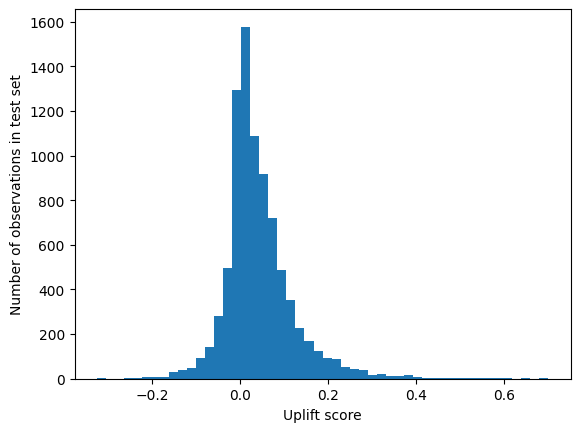

In [244]:

plt.hist(uplift_slearner_test,bins=50)
plt.xlabel('Uplift score')
plt.ylabel('Number of observations in test set')

Text(0, 0.5, 'Number of observations in val set')

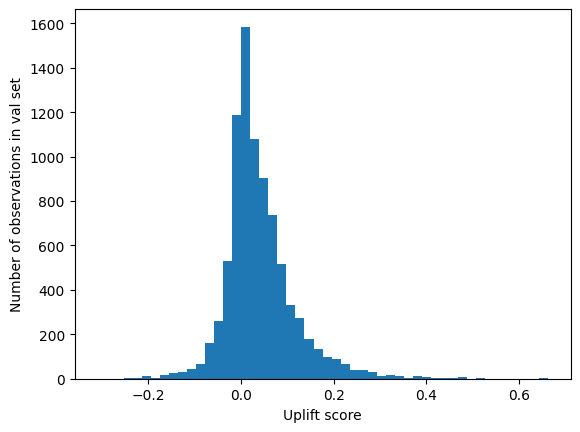

In [245]:

plt.hist(uplift_slearner,bins=50)
plt.xlabel('Uplift score')
plt.ylabel('Number of observations in val set')

In [247]:
from sklift.viz import plot_uplift_curve

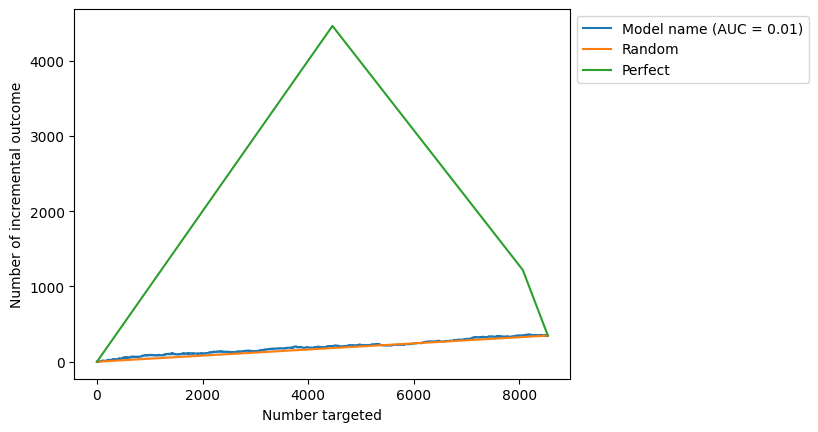

In [248]:
uplift_disp = plot_uplift_curve(
    test[target_col], uplift_slearner_test, test[T_col],
    perfect=True, name='Model name'
);

We can see that our uplift score mostly concentrated at 0, meaning that our intervention / treatment does not change conversion much

#### Policy 

After looking at the uplift result looks like close to random approach, modelling result may not always be better than baseline, so at the time if we decide to choose random approach 

## Key Take Aways

## References

- Uplift Modeling for Multiple Treatments with Cost
Optimization, Zhenyu Zao and Totte Harinen (Uber)
- https://www.slideshare.net/PierreGutierrez2/introduction-to-uplift-modelling?from_search=0
- https://www.slideshare.net/PierreGutierrez2/beyond-churn-prediction-an-introduction-to-uplift-modeling?from_search=2
